In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt

In [2]:
theta1 = list(np.linspace(0., np.pi/2, 7))
theta2 = list(np.linspace(np.pi/2, np.pi, 14))
theta = np.array(theta1 + theta2)

phi = np.linspace(0., 2*np.pi, 9)
data = np.zeros((theta.shape[0], phi.shape[0]))
data[:,0], data[0,:], data[-1,:] = 0., 0., 0.
data[1:-1,1], data[1:-1,-1] = 1., 1.
data[1,1:-1], data[-2,1:-1] = 1., 1.
data[2:-2,2], data[2:-2,-2] = 2., 2.
data[2,2:-2], data[-3,2:-2] = 2., 2.
data[3,3:-2] = 3.
data = np.roll(data, 4, 1)

<IPython.core.display.Javascript object>


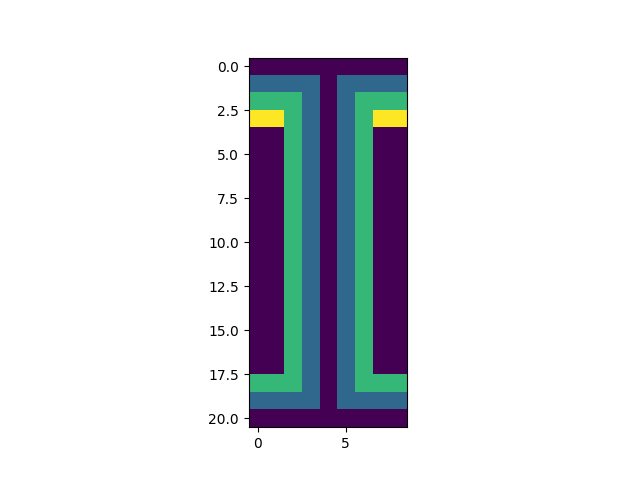

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [2. 2. 2. 1. 0. 1. 2. 2. 2.]
 [3. 3. 2. 1. 0. 1. 2. 3. 3.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [0. 0. 2. 1. 0. 1. 2. 0. 0.]
 [2. 2. 2. 1. 0. 1. 2. 2. 2.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [3]:
fig = plt.figure()
ax1 = fig.gca()
ax1.imshow(data)
print data

In [4]:
data.shape

(7, 9)

In [8]:
lats, lons = np.meshgrid(theta, phi)
print theta.shape, lats.shape
print lats.ravel().shape, lats.flatten().shape

(21,) (9, 21)
(189,) (189,)


In [4]:
data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [2., 2., 2., 1., 0., 1., 2., 2., 2.],
       [3., 3., 2., 1., 0., 1., 2., 3., 3.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [0., 0., 2., 1., 0., 1., 2., 0., 0.],
       [2., 2., 2., 1., 0., 1., 2., 2., 2.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
lats, lons = np.meshgrid(theta, phi)
from scipy.interpolate import SmoothSphereBivariateSpline
lut = SmoothSphereBivariateSpline(lats.ravel(), lons.ravel(),
                                  data.T.ravel(),s=3.5)

In [6]:
data_orig = lut(theta, phi)

In [7]:
fine_lats = np.linspace(0., np.pi, 70)
fine_lons = np.linspace(0., 2 * np.pi, 90)

In [8]:
data_smth = lut(fine_lats, fine_lons)

<IPython.core.display.Javascript object>


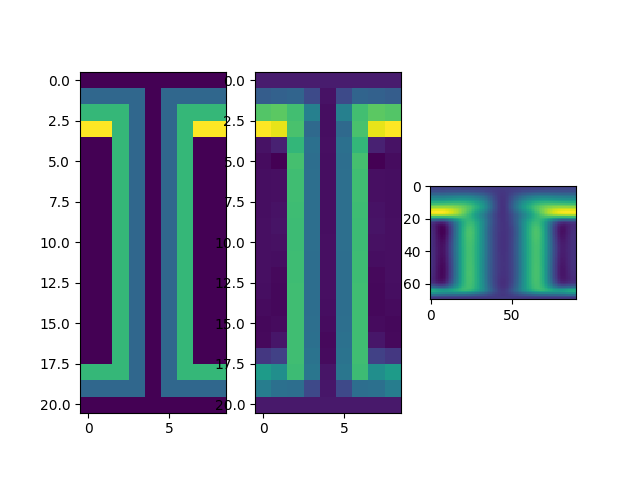

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(data, interpolation='nearest')
ax2 = fig.add_subplot(132)
ax2.imshow(data_orig, interpolation='nearest')
ax3 = fig.add_subplot(133)
ax3.imshow(data_smth, interpolation='nearest')
plt.show()


In [13]:
lut.degrees

(3, 3)

In [14]:
lut.get_coeffs()

array([ 0.1750612 ,  0.1750612 ,  0.1750612 ,  0.1750612 ,  0.1750612 ,
        0.1750612 ,  0.1750612 ,  0.1750612 ,  0.1556545 ,  0.1750612 ,
        0.19446791,  0.1750612 ,  0.1556545 ,  0.1750612 ,  6.0189293 ,
        5.32246397,  6.0189293 , -2.34725629,  6.0189293 ,  5.32246397,
        6.0189293 ,  0.1750612 ,  0.1556545 ,  0.1750612 ,  0.19446791,
        0.1750612 ,  0.1556545 ,  0.1750612 ,  0.1750612 ,  0.1750612 ,
        0.1750612 ,  0.1750612 ,  0.1750612 ,  0.1750612 ,  0.1750612 ])

In [15]:
lut?

In [16]:
data.ravel?

In [17]:
np.ravel?

In [19]:
data.T

array([[0., 1., 2., 3., 2., 1., 0.],
       [0., 1., 2., 3., 2., 1., 0.],
       [0., 1., 2., 2., 2., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 2., 2., 2., 1., 0.],
       [0., 1., 2., 3., 2., 1., 0.],
       [0., 1., 2., 3., 2., 1., 0.]])